O caixeiro com gasolina infinita (e sem conciência ambiental)
========================================



## Introdução



Este problema se trata do clássico problema do caixeiro viajante, onde temos uma série de cidade e devemos encontrar o menor caminho para percorre-las. Porém, desta vez, devemos encontrar o maior caminho, ou seja, o caminho menos eficiente possível, e para isso devemos alterar nosso algoritmos ja realizado para um problema de maximização.



## Objetivo



O objetivo do experimento é desenvolver um algoritmo genético capaz de encontrar a melhor solução (ou pelo menos um palpite muito bom), para o problema do caixeiro viajante com gasolina infinita.

## Importações



In [1]:
import random
from itertools import permutations

import graphviz
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt
from funcoes import distancia_entre_dois_pontos

from funcoes import cria_cidades

from funcoes import populacao_inicial_cv_gasolina_inf as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv_gasolina_inf
from funcoes import selecao_torneio_max
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca_gasolina_inf as funcao_mutacao

from funcoes import funcao_objetivo_cv_gasolina_inf as funcao_objetivo_individuo

from time import perf_counter as pf

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 10
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

In [3]:
# Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv_gasolina_inf(populacao, CIDADES)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_max(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

In [4]:
# Busca por algoritmo genético

start_algoritmo = pf()

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness    
    
fim_algoritmo = pf()

In [5]:
# Busca testando todas as permutações

melhor_fitness_ever = -float("inf")

inicio_all = pf()

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    caminho = list(caminho)
    distancia = funcao_objetivo_individuo(caminho, CIDADES)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

fim_all = pf()

In [6]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto, f'em {fim_algoritmo-start_algoritmo} segundos')

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever, f'em {fim_all-inicio_all} segundos')


Melhor individuo obtido por algoritmos genéticos:
['Cidade 6', 'Cidade 8', 'Cidade 1', 'Cidade 4', 'Cidade 9', 'Cidade 7', 'Cidade 3', 'Cidade 2', 'Cidade 0', 'Cidade 5'] com distância: 6.664412125444982 em 0.9649376000000007 segundos

Melhor individuo obtido por busca exaustiva:
['Cidade 0', 'Cidade 2', 'Cidade 5', 'Cidade 6', 'Cidade 8', 'Cidade 1', 'Cidade 4', 'Cidade 9', 'Cidade 7', 'Cidade 3'] com distância: 6.664412125444982 em 25.1282478 segundos


Podemos ver que o algoritmo foi capaz de conseguir encontrar o maior caminho capaz de resolver o problema, para isso, foram testados indivíduos, porém agora com um problema de maximização, deste caso da distância percorrida. Além de conseguir no melhor resultado possível (obtido pela busca exaustiva), o algoritmo ainda coseguiu chegar em tal de maneira rápida, já que sua execução necessitou apenas de um pouco mais de 1 segundo, enquanto a busca exaustiva que prova que esta é a melhor solução demorou 26 segundos. Podemos considerar também que foram utilizadas apenas 10 cidades, um número consideravelmente pequeno, e quanto maior o número de cidades, teremos um aumento exponencial no tempo tomado pela busca exaustiva, enquanto o algoritmo tende a ter um desempenho muito melhor.

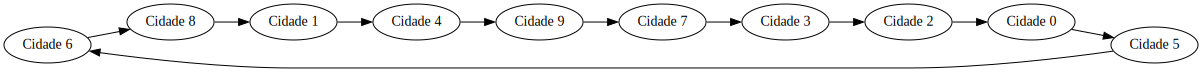

In [7]:
g = graphviz.Digraph(format='svg', graph_attr={'rankdir': 'LR'}, comment='Maior caminho possível')

for node in melhor_individuo_ja_visto:
    g.node(node, node)

individuo_copy = deque(melhor_individuo_ja_visto)
individuo_copy.rotate(-1)
    
for ini, che in zip(melhor_individuo_ja_visto, individuo_copy):
    g.edge(ini, che)

g

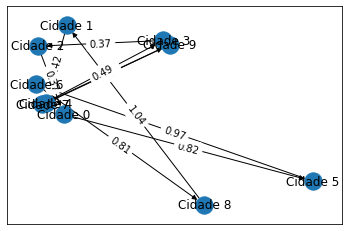

<Figure size 720x576 with 0 Axes>

In [8]:
G = nx.DiGraph()

for cidade in melhor_individuo_ja_visto:
    G.add_node(cidade)
    
individuo_copy = deque(melhor_individuo_ja_visto)
individuo_copy.rotate(-1)
    
for ini, che in zip(melhor_individuo_ja_visto, individuo_copy):
    G.add_edge(ini, che, weight=round(distancia_entre_dois_pontos(CIDADES[ini], CIDADES[che]), 2))
    
edges = [(u, v) for (u, v, d) in G.edges(data=True)]

nx.draw_networkx(G, CIDADES)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, CIDADES, edge_labels)

_ = plt.figure(figsize=(10, 8))

## Conclusão

O objetivo do notebook encontrar a solução do problema do caixeiro viajante com gasolina infinita e mostrar seu caminho de maneira gráfica através de grafos. Para que isso fosse possível, foi utilizado como base um algoritmo genético já feito anteriormente, soque desta vez, ao invés de termos um problema de minimização, temos um problema de maximização, ja que desejamos encontrar a maior distância possível.

Considerando o algoritmo em si e seu desempenho, conseguimos alcançar o objetivo proposto, já que através da busca exaustiva comprovamos que o algoritmo chegou no melhor resultado possível para o problema proposto. Ainda podemos ver que o algoritmo teve um desempenho execelente quando comparado com a busca exaustiva, pois o algoritmo chegou na resposta em apenas 1 segundo e a busca demorou 26 segundos.

A outra parte do problema é mostrar a solução para tal de maneira gráfica, e para isso, foi feito um grafo que demosntra o caminho percorrido pelo viajante gastando o máximo de gasolina e poluindo toda a natureza por onde passa.

## Playground



Todo código de teste que não faz parte do seu experimento deve vir aqui. Este código não será considerado na avaliação.

